In [1]:
import pandas as pd

In [2]:
df1= pd.read_csv("spam_cyber_crime.csv")
df2= pd.read_csv("spam.csv")
df= pd.concat([df1,df2],ignore_index=True)
df.head()

,Label,Message
0,spam,Deposit 0.01 BTC and get 10x back instantly: h...
1,spam,Invoice #44312 needs payment today. See detail...
2,ham,Have you seen the updated incident response flow?
3,ham,Don't forget the phishing awareness webinar on...
4,ham,I'm uploading the Q1 security audit report now.


In [3]:
df['Label']= df['Label'].map({"ham":0,"spam":1})
df.head()

,Label,Message
0,1,Deposit 0.01 BTC and get 10x back instantly: h...
1,1,Invoice #44312 needs payment today. See detail...
2,0,Have you seen the updated incident response flow?
3,0,Don't forget the phishing awareness webinar on...
4,0,I'm uploading the Q1 security audit report now.


In [4]:
#pip install nltk

In [5]:
import nltk
nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("writing")

'write'

In [7]:
token= word_tokenize("HELLO!! I am Shreya GOyal, re416")
print(token)

['HELLO', '!', '!', 'I', 'am', 'Shreya', 'GOyal', ',', 're416']


In [8]:
stop_words= set(stopwords.words("english"))
print(stop_words)


{'hasn', 'ourselves', 'whom', "you'll", "weren't", "we'd", 'myself', 'ma', "that'll", 'who', 'd', 'll', "i'd", 'an', 'in', "we've", 'again', 'do', 'are', 'where', 'through', 'then', 'by', 'i', 'shan', 'most', 'very', 'and', 'their', 'her', 'how', "i'll", 'don', 'no', 'such', 'me', 'nor', "you'd", "wouldn't", 'from', "needn't", 'should', 'your', 'some', "he's", "it'll", 's', 'm', "she'll", 'more', "they'd", 'above', "we'll", "shouldn't", "you've", "we're", 'doesn', 'ain', 'wasn', 'aren', "wasn't", 'had', 'to', 'does', 'under', 'what', 'as', 'than', 'at', 'for', "mustn't", 'the', 'further', 'with', 'doing', 'if', 'any', 'am', 'these', 'or', "she'd", "don't", 't', 'has', "shan't", 'yourselves', 'while', 'himself', 'down', 'theirs', 'themselves', 'mightn', 'it', 'a', 've', 'won', 'herself', 'she', 'o', 'them', 'can', 'of', 'ours', 'weren', 'so', "hadn't", "she's", 'my', 'was', "it'd", 'were', 'been', 'there', 'both', 'why', 'too', 'have', 'wouldn', 'about', 'didn', "doesn't", 'just', 'coul

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:

def transform_text(text):
    text= text.lower()
    text= word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)
    
transform_text("HELLO!! I am Shreya GOyal writing writer writes, re416")
        

'hello shreya goyal write writer write re416'

In [13]:
#cleaning data

In [11]:
df['Message']=df['Message'].apply(transform_text)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Message'],df['Label'],test_size=0.2)

In [15]:
print(len(x_train))
print(len(x_test))
print(len(y_test))


6085
1522
1522


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
x_train_tfidf= vectorizer.fit_transform(x_train)
x_train_tfidf.shape

(6085, 5000)

In [17]:
x_test_tfidf= vectorizer.transform(x_test)
x_test_tfidf.shape

(1522, 5000)

In [18]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [19]:
model.fit(x_train_tfidf,y_train)

LogisticRegression()

In [20]:
y_pred=model.predict(x_test_tfidf)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score


In [22]:
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)

0.9776609724047306


In [23]:
recall = recall_score(y_test,y_pred)
print(recall)

0.9073033707865169


In [24]:
prec = precision_score(y_test,y_pred)
print(prec)

0.9969135802469136


In [25]:
f= f1_score(y_test,y_pred)
f

0.95

In [26]:
def predict_spam(message):
  message = transform_text(message)
  message_tfidf = vectorizer.transform([message])
  prediction = model.predict(message_tfidf)

  if( prediction[0] == 1):
    return 1
  else:
    return 0

In [27]:
predict_spam("Your mobile plan will expire soon. Renew now: http://340.auth-fix.com")

1

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

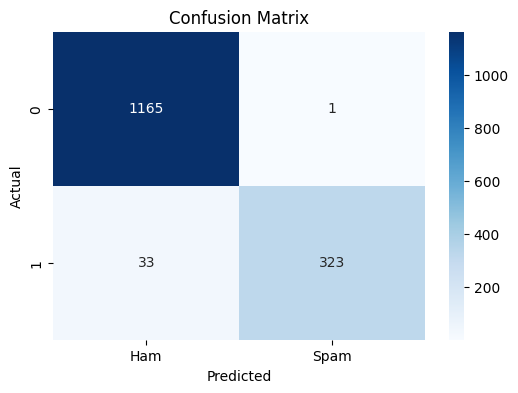

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True, fmt ='d', cmap ='Blues', xticklabels=['Ham','Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [34]:
predict_spam("Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030")

1